![alt text](https://preview.redd.it/0zi6dynk93c51.jpg?auto=webp&s=55c55749b0e3a3367e74f6ce3c486f2a71de6c24)

~~~python
#! pip install sqlalchemy
#! pip install PyMySQL
#! pip install imblearn
~~~

# Will a customer be renting a film next month?


In [6]:
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.8.0-py3-none-any.whl (206 kB)


In [3]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


In [4]:

import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # to get the password without showing the input
password = getpass.getpass()
pd.set_option('display.max_rows',None) #Display all rows


········


# SQL Query: 3 tables

### Additions: 
### 1. customer_longeviity  = first rent - last rent
### 2. rented_june_2005 




In [5]:

connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)


data = pd.read_sql_query('''
SELECT *
FROM table_1
LEFT JOIN table_2 using(customer_id)
LEFT JOIN table_3 using(customer_id);
'''
,engine)
data.head(100)

,customer_id,total_rented_films,total_amount,customer_longetivity,if_rented_june_2005,rented_may_2005,rented_june_2005
0,1,32,118.68,89,1,2.0,7.0
1,2,27,128.73,88,1,1.0,1.0
2,3,26,135.74,88,1,2.0,4.0
3,4,22,81.78,69,1,NaN,6.0
4,5,38,144.62,261,1,3.0,5.0
5,6,28,93.72,90,1,3.0,4.0
6,7,33,151.67,88,1,5.0,5.0
7,8,24,92.76,85,1,1.0,3.0
8,9,23,89.77,263,1,3.0,2.0
9,10,25,99.75,83,1,1.0,5.0


In [48]:
data.shape

(584, 7)

In [9]:
data1 = data.copy()

In [10]:
data1 = data1.set_index('customer_id')

In [11]:
data1.isna().sum()

total_rented_films       0
total_amount             0
customer_longetivity     0
if_rented_june_2005      0
rented_may_2005         77
rented_june_2005         9
dtype: int64

In [12]:
data1 = data1.fillna(0)
data1.isna().sum()

total_rented_films      0
total_amount            0
customer_longetivity    0
if_rented_june_2005     0
rented_may_2005         0
rented_june_2005        0
dtype: int64

In [13]:
data1.describe()

,total_rented_films,total_amount,customer_longetivity,if_rented_june_2005,rented_may_2005,rented_june_2005
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,26.780822,112.579795,131.010274,0.984589,1.921233,3.854452
std,5.092615,25.394973,77.915113,0.123286,1.398588,1.919758
min,12.000000,50.850000,47.000000,0.000000,0.000000,0.000000
25%,23.000000,94.787500,86.000000,1.000000,1.000000,2.000000
50%,26.000000,110.725000,89.000000,1.000000,2.000000,4.000000
75%,30.000000,128.712500,243.000000,1.000000,3.000000,5.000000
max,46.000000,221.550000,266.000000,1.000000,8.000000,11.000000


# Super imbalance data

In [14]:
data1['if_rented_june_2005'].value_counts()

1    575
0      9
Name: if_rented_june_2005, dtype: int64

# Downsamping: Manual

In [15]:
# Manually
# getting sample with the same amount as the minority classa
A = data1[data1['if_rented_june_2005'] == 1].sample(9)
B = data1[data1['if_rented_june_2005'] == 0].sample(9)

downsampled = pd.concat([A,B]).sample(frac=1) # .sample(frac=1) here is just to shuffle the dataframe
downsampled

,total_rented_films,total_amount,customer_longetivity,if_rented_june_2005,rented_may_2005,rented_june_2005
customer_id,,,,,,
419,25,89.75,90,1,1.0,1.0
499,30,123.70,90,1,1.0,4.0
436,30,144.70,90,1,3.0,1.0
433,25,133.75,89,0,2.0,0.0
332,28,118.72,86,0,2.0,0.0
551,26,96.74,88,1,5.0,2.0
195,19,86.81,47,0,0.0,0.0
440,22,88.78,260,0,1.0,0.0
101,24,96.76,263,0,1.0,0.0


In [16]:
downsampled['if_rented_june_2005'].value_counts()

1    9
0    9
Name: if_rented_june_2005, dtype: int64

In [17]:
downsampled.isna().sum()

total_rented_films      0
total_amount            0
customer_longetivity    0
if_rented_june_2005     0
rented_may_2005         0
rented_june_2005        0
dtype: int64

# Correlations

### total_amount vs total_rented_films

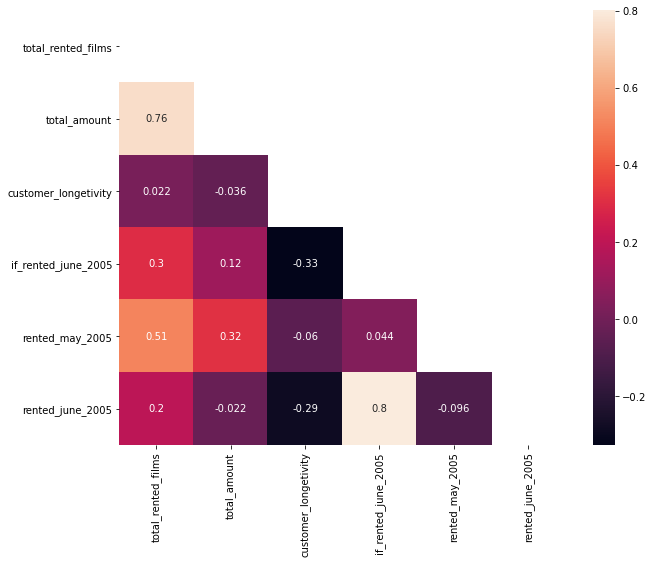

In [18]:
mask = np.zeros_like(downsampled.corr())
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(downsampled.corr(), mask=mask, annot=True)
plt.show()

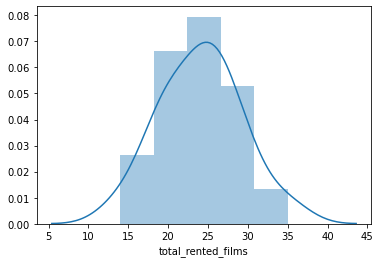

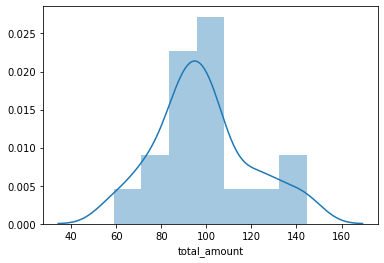

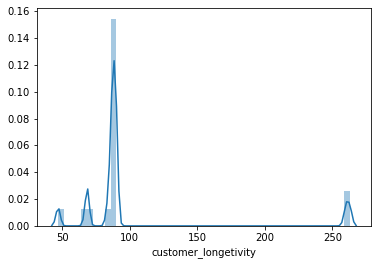

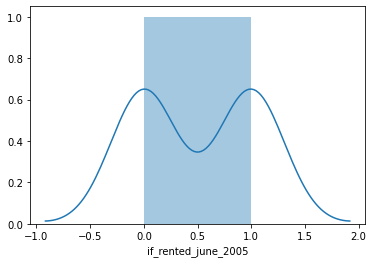

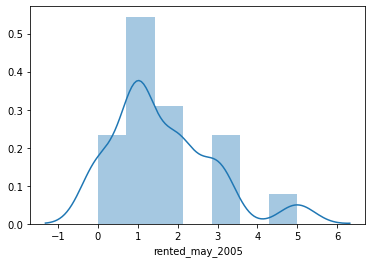

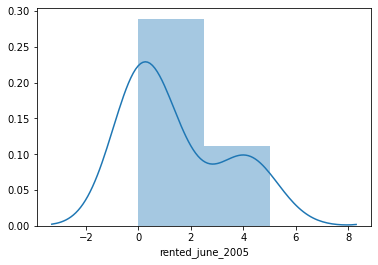

In [19]:
for col in downsampled.select_dtypes(np.number):
    sns.distplot(downsampled[col])
    plt.show()

In [20]:
for col in downsampled.select_dtypes('object'):
    print(downsampled[col].value_counts(), '\n') #unique()

In [21]:
downsampled.columns

Index(['total_rented_films', 'total_amount', 'customer_longetivity',
       'if_rented_june_2005', 'rented_may_2005', 'rented_june_2005'],
      dtype='object')

In [23]:
y = downsampled['if_rented_june_2005']
X = downsampled.drop('if_rented_june_2005', axis=1)

# Adjusted test size to 0.4 but made things worse left it at 0.2

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) 

# 

In [39]:
classification = LogisticRegression(random_state=42, max_iter=1000)
classification.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

# Managed to lower score to .75

In [40]:
classification.score(X_test, y_test) # checking the score without the need for predictions
# 0.8729913265649163

0.75

In [42]:
predictions = classification.predict(X_test)
predictions

array([0, 1, 0, 1], dtype=int64)

In [41]:
y_test

customer_id
419    1
499    1
101    0
551    1
Name: if_rented_june_2005, dtype: int64

In [34]:
predictions_ = classification.predict_proba(X_test)
predictions_

array([[0.50352448, 0.49647552],
       [0.00254376, 0.99745624],
       [0.98983723, 0.01016277],
       [0.33043505, 0.66956495]])

In [35]:
confusion_matrix(y_test, predictions) # normalize : {'true', 'pred', 'all'}

array([[1, 0],
       [1, 2]], dtype=int64)

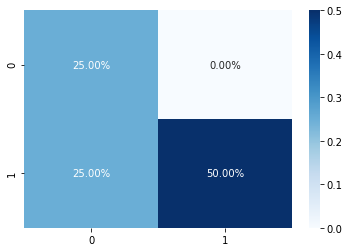

In [36]:
cf_matrix = confusion_matrix(y_test, predictions, normalize='all')
sns.heatmap(cf_matrix, annot=True, fmt='.2%', cmap='Blues')

# Confusion Matrix

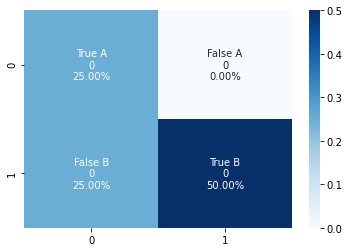

In [37]:
group_names = ['True A', 'False A', 'False B', 'True B']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

# Conclusion:

### Score improved. Might need a bigger sample to test further

### Confusion matrix: 

### 25% False positives: How to interpret this? Might rent but won't pay?
### 50% True positives: Will rent next month